In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Create DataFrame
df = pd.read_csv("data/books_data.csv", parse_dates=["Date"], index_col=[0])
df["Revenue"] = df["Price"] * df["Quantity"]
df

,Book_ID,Title,Author,Category,Price,Quantity,Customer_Age,Customer_Gender,Revenue
Date,,,,,,,,,
2023-01-01,B001,The Great Gatsby,F. Scott Fitzgerald,Fiction,12.99,2,35,F,25.98
2023-01-01,B002,To Kill a Mockingbird,Harper Lee,Fiction,14.99,1,28,M,14.99
2023-01-02,B003,Pride and Prejudice,Jane Austen,Fiction,9.99,3,42,F,29.97
2023-01-02,B004,1984,George Orwell,Science Fiction,11.99,2,31,M,23.98
2023-01-03,B005,The Catcher in the Rye,J.D. Salinger,Fiction,13.99,1,19,F,13.99
2023-01-03,B001,The Great Gatsby,F. Scott Fitzgerald,Fiction,12.99,1,55,M,12.99
2023-01-04,B006,To the Lighthouse,Virginia Woolf,Fiction,10.99,2,40,F,21.98
2023-01-04,B007,Brave New World,Aldous Huxley,Science Fiction,12.99,1,27,M,12.99
2023-01-05,B008,The Hobbit,J.R.R. Tolkien,Fantasy,15.99,3,33,M,47.97


In [13]:
# a+c. Total revenue / average price per category
category_data = df.groupby("Category").agg(
    Total_Revenue=("Revenue", "sum"),
    Average_Price=("Price", "mean")
)

category_data

,Total_Revenue,Average_Price
Category,,
Fantasy,72.96,20.490000
Fiction,221.82,12.906667
Mystery,14.99,14.990000
Science Fiction,62.95,12.656667
Thriller,25.98,12.990000
Young Adult,41.97,13.990000


In [16]:
# b. Top 3 best selling books by quantity
df.nlargest(3, columns=["Quantity"])

,Book_ID,Title,Author,Category,Price,Quantity,Customer_Age,Customer_Gender,Revenue
Date,,,,,,,,,
2023-01-02,B003,Pride and Prejudice,Jane Austen,Fiction,9.99,3,42,F,29.97
2023-01-05,B008,The Hobbit,J.R.R. Tolkien,Fantasy,15.99,3,33,M,47.97
2023-01-08,B013,The Hunger Games,Suzanne Collins,Young Adult,13.99,3,17,F,41.97


In [17]:
# d. Determine the most popular book category among different age groups (you can define the age groups)
age_groups = [0, 12, 18, 40, 80, 100]
labels = ["children", "teen", "younger adult", "older adult", "elderly"]
df["Customer_AgeGroup"] = pd.cut(df["Customer_Age"], bins=age_groups, labels=labels, right=False)

df.groupby(["Customer_AgeGroup", "Category"])["Book_ID"].count().unstack().T.idxmax()

/tmp/ipykernel_2390/1535471739.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Customer_AgeGroup", "Category"])["Book_ID"].count().unstack().T.idxmax()


Customer_AgeGroup
children             Fantasy
teen             Young Adult
younger adult        Fiction
older adult          Fiction
elderly              Fantasy
dtype: object

<Axes: title={'center': 'Daily Revenue'}, xlabel='Date', ylabel='Revenue'>

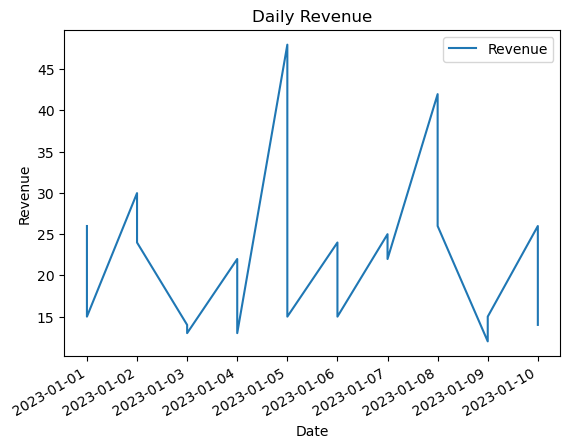

In [23]:
# e. Daily Revenue Trend
df[["Revenue"]].plot(ylabel="Revenue", title="Daily Revenue")

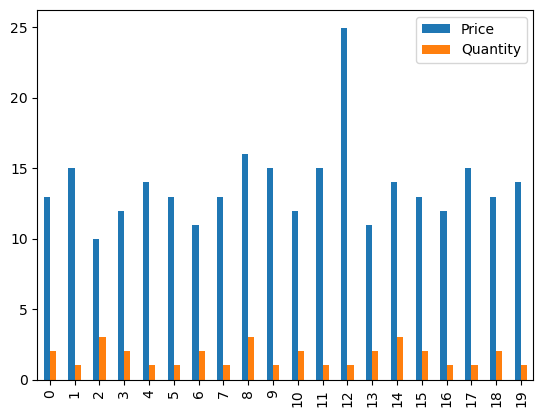

In [7]:
# f. Find correlation between book price and quantity sold
ax = df[["Price", "Quantity"]].plot.bar()

# if a book is really expensive, then it's sales will be lower, because people don't want to buy it